# Data Type #

tuble 使用 ()  
list 使用 [ ]  
set 使用 { }
numpy.ndarray使用np.array()宣告

-------------
List Comprehension  
因為list很常用, 所以發展出了這種只要一行又高效的寫法


In [71]:
import numpy as np
new_tuble = (1, 2, 3)
#new_tuble[0] = new_tuble[0] + 1
new_list = [1, 2, 3]
new_list[0] = new_list[0] + 1
new_dict = {1,2,3}
new_array = np.array([1,2,3])

#List Comprehension 
square = [ x**2 for x in range(10) ]

print(type(new_tuble))
print(type(new_list))
print(type(new_dict))
print(type(new_array))
print(square)

<class 'tuple'>
<class 'list'>
<class 'set'>
<class 'numpy.ndarray'>
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


# 正規表示式(Regular Expression) #
 - . match any character except a newline
 - \* mach 0 or more repetitions of the preceding character
 - \+ mach 1 or more repetitions of the preceding character
 - {m} match exactly m copies of the previous character
 - {m,n} match from m to n repetitions of the preceding character
 - \ escapes special characters
 - [] used to indicate a set of characters
 
使用如下程式碼引入  
```python
 import re  
```


In [70]:
import re
line = "why people don't know what regex are? let me know asdfal2@als.com, Users1@gmail.de " \
       "Dariush@dasd-asasdsa.com.lo,Dariush.lastName@someDomain.com"
match = re.findall(r'[A-Za-z0-9._]+@[A-Za-z_-]+.[com]+', line)
for i in match:
    print(i)

asdfal2@als.com
Dariush@dasd-asasdsa.com
Dariush.lastName@someDomain.com


# 生成器 (Generator)

In [73]:
import psutil
before_used = psutil.virtual_memory().used
after_used = 0
print("-------------- generator -------------")
print("before:", before_used)

range_run = 1000000
for i in ( x**2 for x in range(range_run) ):
  if (i == (range_run-1)**2):
    after_used = psutil.virtual_memory().used
    print("after:", after_used)

iterator_total = after_used - before_used
print("Iterator_total: ", iterator_total)
print("-------------- iterator -------------")
before_used = psutil.virtual_memory().used
print("before:", before_used)
after_used=0
for i in [ x**2 for x in range(range_run) ]:
  if (i == (range_run-1)**2):
    after_used = psutil.virtual_memory().used
    print("after:", after_used)
  continue
generator_total = after_used - before_used
print("Generator_total: ",generator_total)
print("---------------------------------------")

-------------- generator -------------
before: 2148757504
after: 2148622336
Iterator_total:  -135168
-------------- iterator -------------
before: 2148622336
after: 2180493312
Generator_total:  31870976
---------------------------------------


### 乘法

In [9]:
import numpy as np
x = np.array([[1,2],[3,4],[5,6]])
w = np.array([1,2])
y = np.array([1,2,3])
#w對x的行作乘法: [w1x1[0], w2x2[0]], [w1x1[1], w2x2[1]], [w1x1[2], w2x2[2]] 
print(x*w)
#x = [w1x1[0]+w2x2[0] , w1x1[1]+w2x2[1], w1x1[2]+w2x2[2]]
print(np.dot(x,w))

#z = [y1x1[0]+y2x1[1]+y3x1[2]],[y1x2[0]+y2x2[1]+y3x2[2]]]
print(np.dot(x.T,y))

##沒有以下  
#y對x的列作乘法: [y1x1[0], y1x2[0]], [y2x1[1], y2x2[1]], [y3x1[2], y3x2[2]] 
print(np.array(x.T*y).T)

[[ 1  4]
 [ 3  8]
 [ 5 12]]
[ 5 11 17]
[22 28]
[[ 1  2]
 [ 6  8]
 [15 18]]
(3,)
[1.01 2.02 3.03]


In [27]:
x = np.array([[1,2],[3,4],[5,6]])
w = np.array([1.,2.])
w = w[:,np.newaxis]
print(np.dot(x,w).shape)


x1 = np.array([1,2,3])
x2 = np.array([4,5,6])

x1 = x1[:,np.newaxis]
print(x2.shape)
x1 = x1 + x2
print(x1)

(3, 1)
(3,)
[[5 6 7]
 [6 7 8]
 [7 8 9]]


# Iris dataset #
## 鳶尾花卉資料集 ##
數據集包含了150個樣本, 有四個向量維度  
分為三個類別, 分別是山鳶尾、變色鳶尾和維吉尼亞鳶尾  
每筆資料分別記錄了花萼和花瓣的長度和寬度這四個向量維度 

sklsearn包含了iris資料集  
使用如下程式碼引入  
`from sklearn import datasets`  
  `iris = datasets.load_iris()`
   
------

# 第一個例子是直方圖  #
<font color="red"> 我覺得橫式直方圖搭配threshold可以很好的表現資料是否有超出我們的預期 <font>

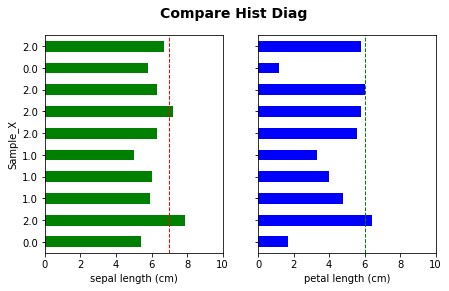

In [3]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
%matplotlib inline
#mpl.style.use('fivethirtyeight')

iris = datasets.load_iris()
label=np.array(iris['target']).reshape(150,1)
iris_with_label = np.hstack((iris['data'],label))
column_name = iris.feature_names+ ['Label']
df = pd.DataFrame(iris_with_label, columns=column_name)
g_state=df.groupby('Label')


fig,axis = plt.subplots(1,2,figsize=(7,4),sharey=True)
#sharey表示共用Y軸, 1,2表示1x2兩張圖
fig.suptitle('Compare Hist Diag',fontsize=14,fontweight='bold')
sample_df=df.sample(10)
#sample隨機取出10組資料
sample_df.plot(kind='barh',color='g',y=df.columns[0],x=df.columns[4],ax=axis[0],legend=False)
sample_df.plot(kind='barh',color='b',y=df.columns[2],x=df.columns[4],ax=axis[1],legend=False)
axis[0].set_xlim(0,10)
axis[1].set_xlim(0,10)
axis[0].set(title="",xlabel=df.columns[0],ylabel='Sample_X')
axis[1].set(title="",xlabel=df.columns[2])
#axvline畫出垂直的虛線
axis[0].axvline(x=7,color='red',label='average',linestyle='--',linewidth=1)
axis[1].axvline(x=6,color='green',label='average',linestyle='--',linewidth=1)
fig.savefig('foo.png',dpi=100)
plt.show()

-----------
# 第2個例子是各維度間的關係圖  #
<font color="red"> 可以初步觀察各維度間的相互影響, 決定要使用那些維度
<font>

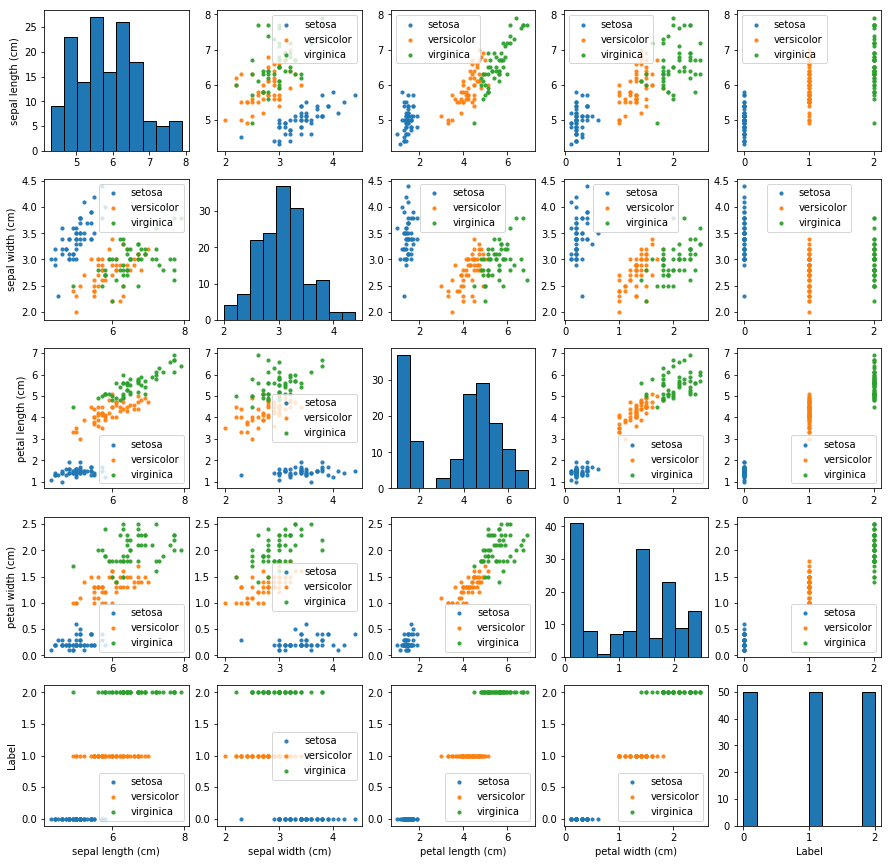

In [4]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
%matplotlib inline
#mpl.style.use('fivethirtyeight')

iris = datasets.load_iris()
label=np.array(iris['target']).reshape(150,1)
iris_with_label = np.hstack((iris['data'],label))
column_name = iris.feature_names+ ['Label']
df = pd.DataFrame(iris_with_label, columns=column_name)
g_state=df.groupby('Label')
fig,axis = plt.subplots(5,5,figsize=(15,15))
#fig.suptitle("Title for whole figure", fontsize=16)
for i in range (5):
    axis[i,0].set_ylabel(column_name[i])
    axis[4,i].set_xlabel(column_name[i])

for i in range (5):
    for j in range (5):
        if (i == j):
            n, bins, patchs = axis[i,j].hist(df.iloc[:,i],edgecolor='black')
            continue
        for k in range (3): # 0,1,2 label
            y = g_state.get_group(k)[column_name[i]] #ex sepal length vs sepal width
            x = g_state.get_group(k)[column_name[j]] 
            axis[i,j].scatter(x,y,s=10,marker='o',alpha=0.9)
        axis[i,j].legend(['setosa','versicolor','virginica'])
plt.show()

```python

PARAM_DICT = {
  LogisticRegression: {
    'reg__tol': [1e-2, 1e-4, 1e-6],
    'reg__fit_intercept': [True, False],
    'reg__penalty': ['l1', 'l2']
  },
  RidgeClassifier: {
    'reg__alpha': [0.1, 1, 100],
    'reg__copy_X': [True, False],
    'reg__fit_intercept': [True, False],
    'reg__tol': [0.1, 1],
    'reg__solver': ['auto', 'svd', 'cholesky', 'lsqr',
      'sparse_cg', 'sag', 'saga'
    ]
  },
KNeighborsClassifier: {
    'reg__n_neighbors': [5, 30, 100]
  },
  GaussianNB: {
  },
DecisionTreeClassifier: {
    'reg__max_depth': [5, 10, 20],
    'reg__max_features': [0.3, 0.7, 1.0],
    'reg__max_leaf_nodes': [10, 50, 100],
    'reg__splitter': ['best', 'random']
  },
BaggingClassifier: {
    'reg__bootstrap': [True, False],
    'reg__bootstrap_features': [True, False],
    'reg__max_features': [0.3, 0.7, 1.0],
    'reg__max_samples': [0.3, 0.7, 1.0],
    'reg__n_estimators': [10, 50, 100]
  },
  RandomForestClassifier: {
    'reg__bootstrap': [True, False],
    'reg__max_depth': [5, 10, 20],
    'reg__max_features': [0.3, 0.7, 1.0],
    'reg__max_leaf_nodes': [10, 50, 100],
    'reg__min_impurity_decrease': [0, 0.1, 0.2],
    'reg__n_estimators': [10, 50, 100]
  },
SVC: {
    'reg__C': [10 ** -3, 1, 1000],
    'reg__kernel': ['linear', 'poly', 'rbf'],
    'reg__shrinking': [True, False],
    'reg__probability': [True]
  },
GradientBoostingClassifier: {
    'reg__learning_rate': [0.1, 0.2, 0.5],
    # 'reg__loss': ['ls', 'lad', 'huber', 'quantile'],
    'reg__max_depth': [10, 20, 50],
    'reg__max_features': [0.5, 0.8, 1.0],
    'reg__max_leaf_nodes': [10, 50, 100],
    'reg__min_impurity_decrease': [0, 0.1, 0.2],
    'reg__min_samples_leaf': [5, 10, 20],
    'reg__min_samples_split': [5, 10, 20],
    'reg__n_estimators': [10, 50, 100]
  },
  XGBClassifier: {
    'reg__booster': ['gbtree', 'gblinear', 'dart'],
    'reg__learning_rate': [0.2, 0.5, 0.8],
    'reg__max_depth': [5, 10, 20],
    'reg__n_estimators': [10, 50, 100],
    'reg__reg_alpha': [0.1, 1, 10],
    'reg__reg_lambda': [0.1, 1, 10],
    'reg__subsample': [0.3, 0.5, 0.8],
    'reg__probability': [True]
  }
}
```